In [39]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [40]:
test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')

In [41]:
mean_Age = train['Age'].mean()
print(mean_Age)

29.69911764705882


In [42]:
median_Age = train['Age'].median()
print(median_Age)

28.0


In [43]:
Surv_train = train['Survived']
train.drop(['Name','Ticket','Embarked','PassengerId'], axis='columns', inplace=True)
test.drop(['Name','Ticket','Embarked','PassengerId'], axis='columns', inplace=True)

In [44]:
test = test.fillna(0)
train = train.fillna(0)

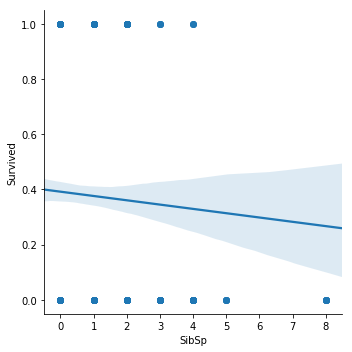

In [45]:
sns.lmplot('SibSp','Survived',train)

In [46]:
train.loc[train["SibSp"] == 8,"SibSp"] = 5
test.loc[test["SibSp"] == 8,"SibSp"] = 5

In [47]:
train.loc[train["Cabin"] != 0,"Cabin"] = 1
test.loc[test["Cabin"] != 0,"Cabin"] = 1

In [48]:
train.loc[train["Sex"] == "male","Sex"] = 0
train.loc[train["Sex"] == "female","Sex"] = 1
test.loc[test["Sex"] == "male","Sex"] = 0
test.loc[test["Sex"] == "female","Sex"] = 1

In [49]:
train.loc[train["Age"] == 0,"Age"] = mean_Age
test.loc[test["Age"] == 0,"Age"] = mean_Age

In [50]:
decision = ExtraTreesClassifier(n_estimators=800)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(train, Surv_train, test_size=0.33, random_state=42)

In [52]:
decision.fit(X_train, y_train)
pred = decision.predict(X_test)

In [53]:
print('Accuracy: \n', accuracy_score(y_test, pred, normalize = True))

Accuracy: 
 1.0
